# 52000841_Nguyen Trong Khoi     52000386_Dao Huu Phi Quan

# Import python lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior
tf.compat.v1.disable_eager_execution()
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Embedding, Dropout, SimpleRNN, GRU, concatenate
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



dataset\brain_stroke.csv


# Loading dataset

In [2]:
df = pd.read_csv("dataset/brain_stroke.csv")
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


# Checking null values

In [3]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Data Viz

<Figure size 800x600 with 0 Axes>

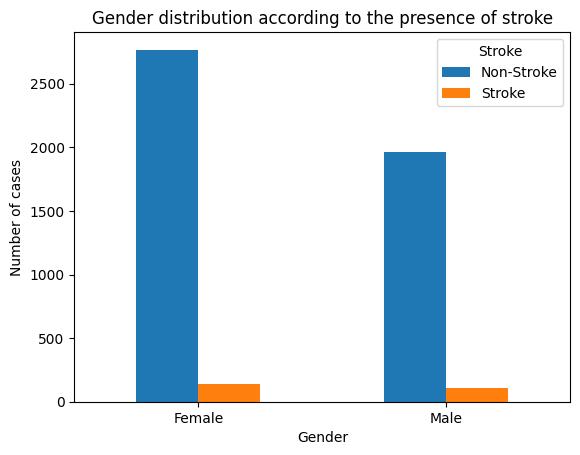

In [5]:
plt.figure(figsize=(8, 6))
gender_stroke = df.groupby(['gender', 'stroke']).size().unstack()
gender_stroke.plot(kind='bar')
plt.title('Gender distribution according to the presence of stroke')
plt.xlabel('Gender')
plt.ylabel('Number of cases')
plt.legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()

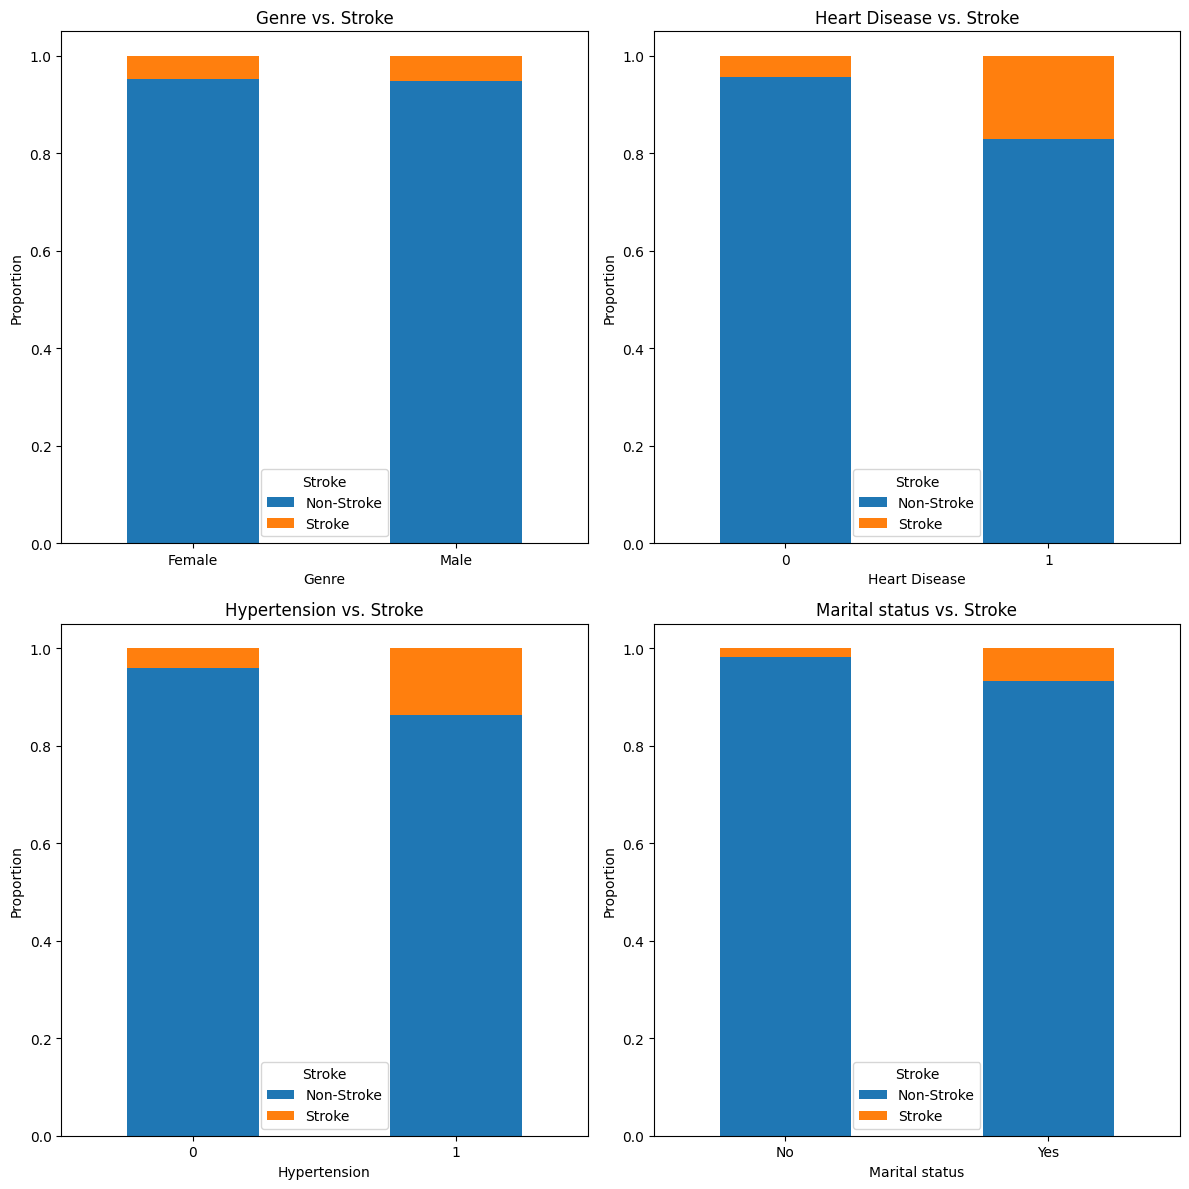

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Calculate the proportions of strokes by gender
gender_stroke = df.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_props = gender_stroke.div(gender_stroke.sum(axis=1), axis=0)
gender_stroke_props.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Genre vs. Stroke')
axes[0, 0].set_xlabel('Genre')
axes[0, 0].set_ylabel('Proportion')
axes[0, 0].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Calculate the proportions for the presence of stroke as a function of heart disease
heart_disease_stroke = df.groupby(['heart_disease', 'stroke']).size().unstack()
heart_disease_stroke_props = heart_disease_stroke.div(heart_disease_stroke.sum(axis=1), axis=0)
heart_disease_stroke_props.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Disease vs. Stroke')
axes[0, 1].set_xlabel('Heart Disease')
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Calculate the proportions for the presence of stroke as a function of hypertension
hypertension_stroke = df.groupby(['hypertension', 'stroke']).size().unstack()
hypertension_stroke_props = hypertension_stroke.div(hypertension_stroke.sum(axis=1), axis=0)
hypertension_stroke_props.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Hypertension vs. Stroke')
axes[1, 0].set_xlabel('Hypertension')
axes[1, 0].set_ylabel('Proportion')
axes[1, 0].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Calculate the proportions for the presence of stroke according to marital status (Why not ?)
ever_married_stroke = df.groupby(['ever_married', 'stroke']).size().unstack()
ever_married_stroke_props = ever_married_stroke.div(ever_married_stroke.sum(axis=1), axis=0)
ever_married_stroke_props.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Marital status vs. Stroke')
axes[1, 1].set_xlabel('Marital status')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].legend(title='Stroke', labels=['Non-Stroke', 'Stroke'])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

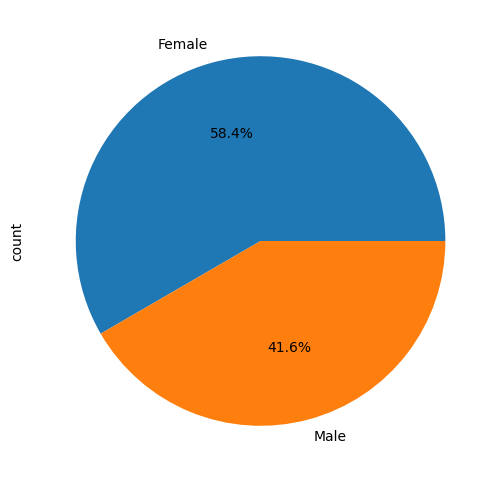

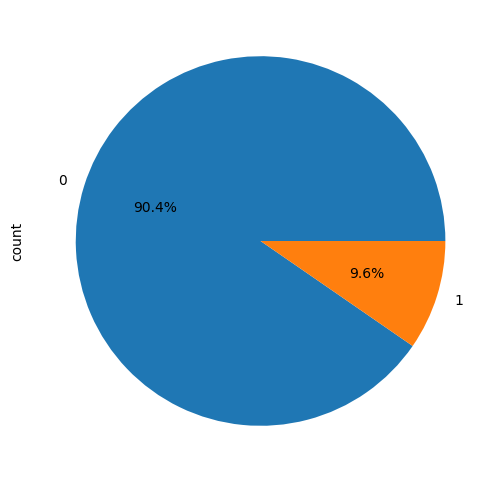

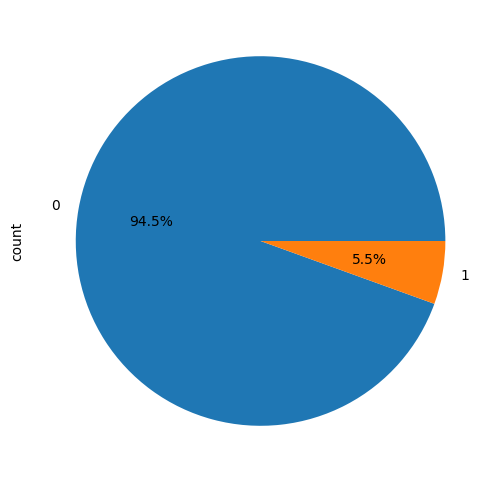

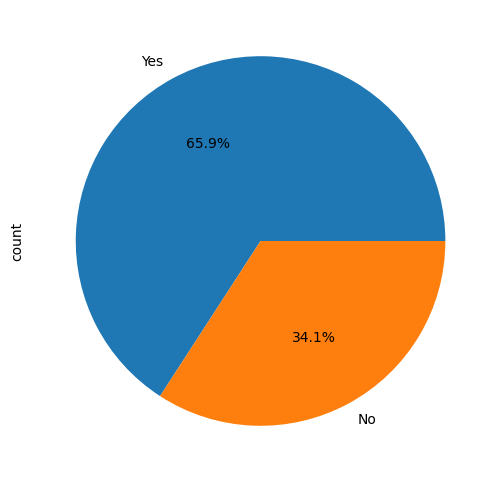

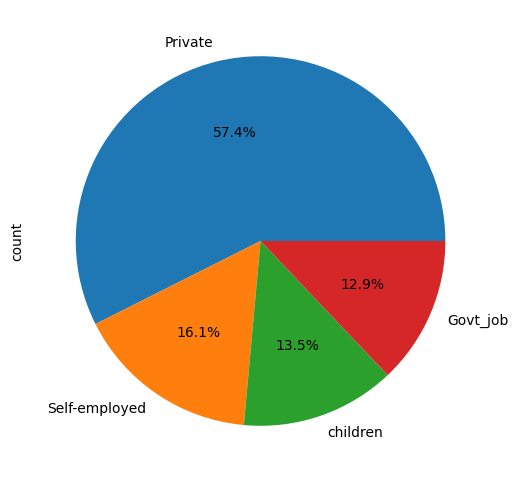

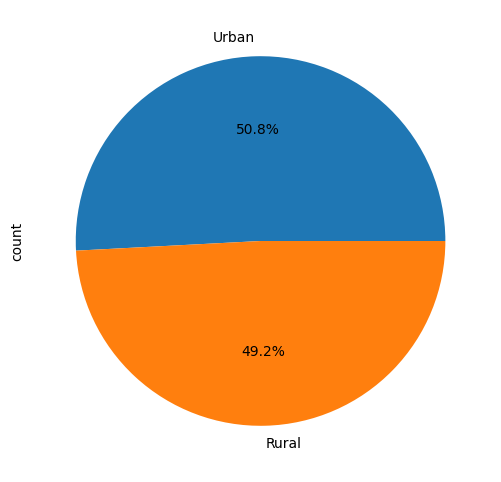

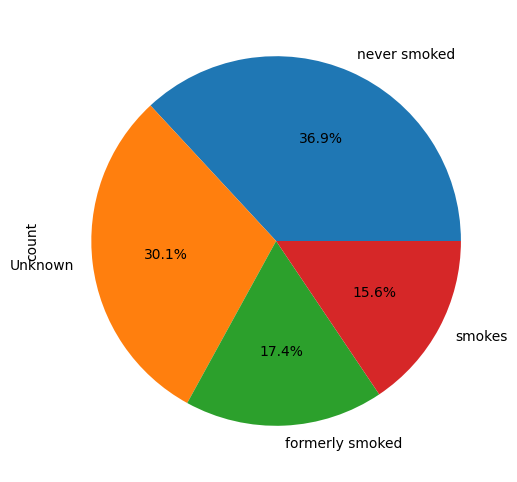

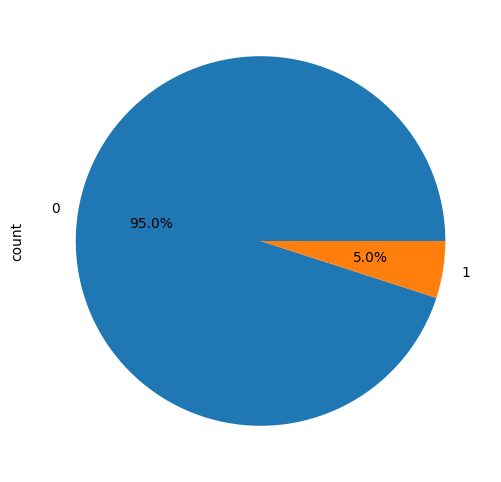

In [7]:
data_categorical = df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

for i in data_categorical.columns:
    plt.figure(figsize = (15,6))
    data_categorical[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

# Data pre Processing
# Label encoding

In [8]:

le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["gender"] = df["gender"].astype(float)
df["ever_married"]=le.fit_transform(df["ever_married"])
df["work_type"]=le.fit_transform(df["work_type"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1.0,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0.0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0.0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1.0,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1.0,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0.0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1.0,40.0,0,0,1,1,0,83.94,30.0,3,0


In [9]:
df["stroke"].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [10]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.055796,-0.012093,-0.062666,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,-0.415935,0.017155,0.236763,0.373703,0.265623,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.170028,0.158762,0.110045,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,-0.036943,0.002125,0.166847,0.060926,0.048093,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,-0.406439,0.008191,0.150724,0.371690,0.262384,0.108398
work_type,0.065784,-0.415935,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.059658,-0.382418,-0.356738,-0.041835
Residence_type,-0.004301,0.017155,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.001346,0.013185,0.010209,0.016494
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,-0.059658,0.001346,1.000000,0.186348,0.064089,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,-0.382418,0.013185,0.186348,1.000000,0.243111,0.056926
smoking_status,-0.062666,0.265623,0.110045,0.048093,0.262384,-0.356738,0.010209,0.064089,0.243111,1.000000,0.027463


In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# Imbalencingn technique using smote

In [12]:
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)
Counter(y_data)

Counter({1: 4733, 0: 4733})

# Feature scaling using normalizaton technique

In [13]:
mn=MinMaxScaler()
x_scaled=mn.fit_transform(x_data)
x_scaled

array([[1.        , 0.81689453, 0.        , ..., 0.80126489, 0.64756447,
        0.33333333],
       [1.        , 0.97558594, 0.        , ..., 0.23451205, 0.53008596,
        0.66666667],
       [0.        , 0.59716797, 0.        , ..., 0.53600776, 0.58452722,
        1.        ],
       ...,
       [1.        , 0.9737661 , 0.        , ..., 0.1542704 , 0.4041002 ,
        0.51242344],
       [0.        , 0.98983946, 0.        , ..., 0.01849222, 0.52907611,
        0.62042491],
       [0.        , 0.45182975, 0.        , ..., 0.12087499, 0.38052388,
        0.75743365]])

In [14]:
abc=pd.DataFrame(x_scaled)
abc

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.816895,0.000000,1.0,1.00000,0.333333,1.000000,0.801265,0.647564,0.333333
1,1.0,0.975586,0.000000,1.0,1.00000,0.333333,0.000000,0.234512,0.530086,0.666667
2,0.0,0.597168,0.000000,0.0,1.00000,0.333333,1.000000,0.536008,0.584527,1.000000
3,0.0,0.963379,1.000000,0.0,1.00000,0.666667,0.000000,0.549349,0.286533,0.666667
4,1.0,0.987793,0.000000,0.0,1.00000,0.333333,1.000000,0.605161,0.429799,0.333333
...,...,...,...,...,...,...,...,...,...,...
9461,1.0,0.951172,0.537806,0.0,1.00000,0.666667,0.462194,0.364398,0.429171,0.154065
9462,0.0,0.662647,0.727191,0.0,1.00000,0.333333,0.727191,0.030912,0.449070,0.090936
9463,1.0,0.973766,0.000000,0.0,0.46273,0.512423,0.537270,0.154270,0.404100,0.512423
9464,0.0,0.989839,0.000000,0.0,1.00000,0.333333,0.138725,0.018492,0.529076,0.620425


# NAIVE BAYES

# before normalization using ploting

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

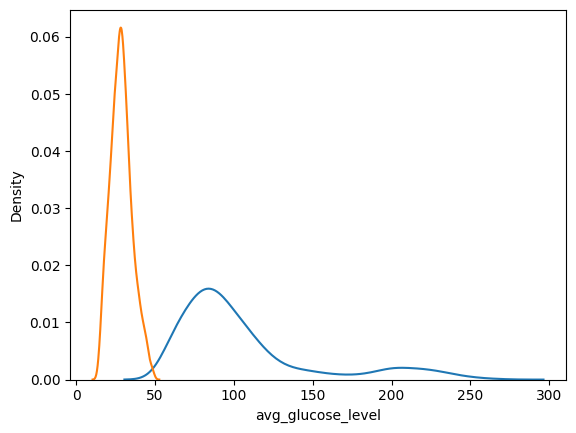

In [15]:
sns.kdeplot(df["avg_glucose_level"])
sns.kdeplot(df["bmi"])

# After normalization

<Axes: xlabel='7', ylabel='Density'>

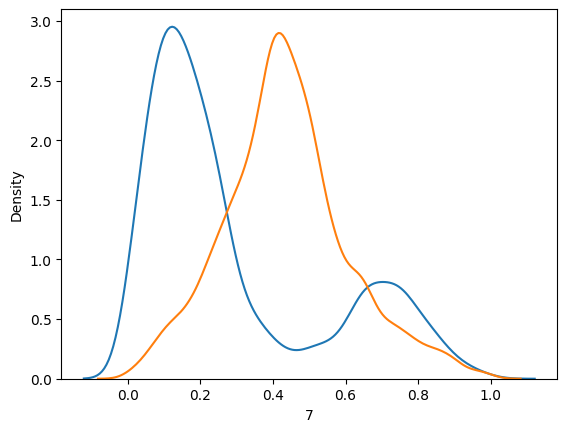

In [16]:
sns.kdeplot(abc[7])
sns.kdeplot(abc[8])

# Spliting dataset in train and test

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,test_size=0.2,random_state=11)

# Fitting Naive Bayes model

In [18]:
nb=GaussianNB() # Naive bayes
nb.fit(x_train,y_train)

cv_scores = cross_val_score(nb, x_train, y_train, cv=5) # cross validation

y_pred=nb.predict(x_test)

# Checking accurary score

In [19]:
print("Accurary of Naive Bayes: ", accuracy_score(y_test,y_pred)*100)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_pred))

Accurary of Naive Bayes:  77.29672650475185
Cross-validation scores: [0.78019802 0.77623762 0.78665786 0.7992074  0.77476882]
Average cross-validation score: 0.7834139450933204
              precision    recall  f1-score   support

           0       0.80      0.72      0.75       923
           1       0.75      0.83      0.79       971

    accuracy                           0.77      1894
   macro avg       0.78      0.77      0.77      1894
weighted avg       0.78      0.77      0.77      1894



#

# KNN

# before Normaization

<Axes: xlabel='hypertension', ylabel='Density'>

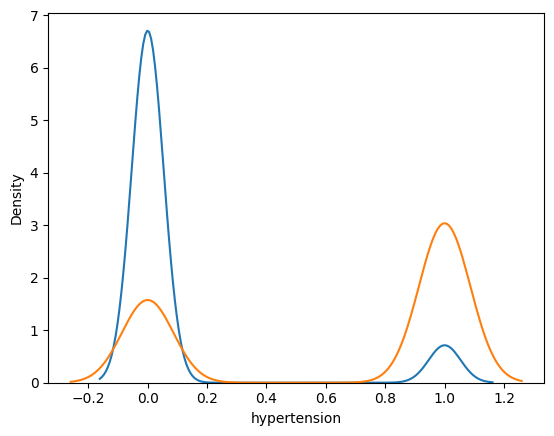

In [20]:
sns.kdeplot(df["hypertension"])
sns.kdeplot(df["ever_married"])

# After normalization

<Axes: xlabel='1', ylabel='Density'>

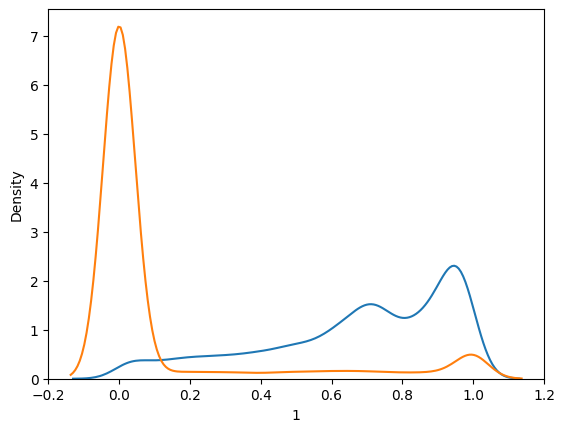

In [21]:
sns.kdeplot(abc[1])
sns.kdeplot(abc[3])

# fitting KNN model

In [31]:
knn=KNeighborsClassifier(metric="minkowski",n_neighbors=10,p=2) # KNN
knn1=KNeighborsClassifier(metric="minkowski",n_neighbors=15,p=2, weights='distance') # thêm trọng số distance giúp tăng accurary
knn.fit(x_train,y_train)
knn1.fit(x_train,y_train)
cv_scores = cross_val_score(knn, x_train, y_train, cv=5) # Cross-validation

In [32]:
y_pred=knn.predict(x_test)
y_pred1=knn1.predict(x_test)

In [34]:
print("Accurary of KNN: ", accuracy_score(y_test,y_pred)*100)
print("Accurary of KNN after using avoid overfitting: ", accuracy_score(y_test,y_pred1)*100)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, y_rms))

Accurary of KNN:  88.96515311510032
Accurary of KNN after using avoid overfitting:  90.76029567053854
Cross-validation scores: [0.87788779 0.88580858 0.88110964 0.91215324 0.89762219]
Average cross-validation score: 0.8909162884584363
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       923
           1       0.98      0.95      0.96       971

    accuracy                           0.96      1894
   macro avg       0.96      0.96      0.96      1894
weighted avg       0.96      0.96      0.96      1894



#

# Random Forest
Mô hình Random Forest thường có sẵn một số cơ chế để kiểm soát overfitting, chúng ta cũng có thể thực hiện một số điều chỉnh thêm để tối ưu hóa hiệu suất mô hình và giảm nguy cơ overfitting chẳng hạn như sử dụng việc tăng giảm số lượng câu cũng như độ sâu của nó.

In [35]:
rms = RandomForestClassifier(n_estimators=7)
rms1 = RandomForestClassifier(n_estimators=50, max_depth=10)
rms.fit(x_train,y_train)
rms1.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [36]:
y_rms=rms.predict(x_test)
y_rms1=rms1.predict(x_test)

In [37]:
print('Random Forest Model accuracy score with 7 decision-trees: {0:0.4f}'. format(accuracy_score(y_test, y_rms)))
print('Random Forest Model accuracy score with 50 decision-trees and max_depth 10: {0:0.4f}'. format(accuracy_score(y_test, y_rms1)))
print(classification_report(y_test, y_rms))

#từ đó ta có thể thấy rằng việc tăng số lượng cây với độ sâu của cây không giúp giảm overfitting trong trường hợp này

Random Forest Model accuracy score with 7 decision-trees: 0.9609
Random Forest Model accuracy score with 50 decision-trees and max_depth 10: 0.9583
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       923
           1       0.98      0.94      0.96       971

    accuracy                           0.96      1894
   macro avg       0.96      0.96      0.96      1894
weighted avg       0.96      0.96      0.96      1894



# Bagging
Mô hình Bagging (Bootstrap Aggregating) thường tự động giảm nguy cơ overfitting, vì nó kết hợp dự đoán từ nhiều mô hình con khác nhau. Tuy nhiên, có một số cách có thể tinh chỉnh và kiểm soát overfitting chẳng hạn như cross validation

In [38]:
bgm=BaggingClassifier(base_estimator=knn,n_estimators=10,random_state=11) 
bgm.fit(x_train,y_train)
cv_scores = cross_val_score(bgm, x_train, y_train, cv=5) #cross validation

In [39]:
bgm_pred=bgm.predict(x_test)

In [40]:
print('Bagging Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, bgm_pred)))
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))
print(classification_report(y_test, bgm_pred))

Bagging Model accuracy score: 0.8970
Cross-validation scores: [0.88052805 0.89438944 0.88573316 0.90422721 0.89828269]
Average cross-validation score: 0.8926321112956739
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       923
           1       0.87      0.94      0.90       971

    accuracy                           0.90      1894
   macro avg       0.90      0.90      0.90      1894
weighted avg       0.90      0.90      0.90      1894



In [41]:
bgm=BaggingClassifier(base_estimator=knn,n_estimators=10,random_state=11)
bgm.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10),
                  random_state=11)

In [42]:
bgm_pred=bgm.predict(x_test)
bgm_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [43]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, bgm_pred)))
print(classification_report(y_test, bgm_pred))

Model accuracy score: 0.8970
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       923
           1       0.87      0.94      0.90       971

    accuracy                           0.90      1894
   macro avg       0.90      0.90      0.90      1894
weighted avg       0.90      0.90      0.90      1894



#

# Feed Forward Neural Network

In [44]:
# Chúng ta chuyển đổi DataFrame của Pandas thành một mảng NumPy và chia thành tập huấn luyện và tập kiểm tra.
X_train = df.drop('stroke', axis=1).values
y_train = df['stroke'].values

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [45]:
#Chúng ta sẽ xây dựng một bộ phân loại với hai lớp: "stroke" và "dont stroke", nên chúng ta tạo các nhãn tương ứng.
labels_train = (np.arange(2) == y_train[:,None]).astype(np.float32)
labels_test = (np.arange(2) == y_test[:,None]).astype(np.float32)

In [46]:
#định nghia TensorFlow model của chúng ta
inputs = tf.placeholder(tf.float32, shape=(None, X_train.shape[1]), name='inputs')
label = tf.placeholder(tf.float32, shape=(None, 2), name='labels')

# lớp đầu tiên
hid1_size = 128
w1 = tf.Variable(tf.random_normal([hid1_size, X_train.shape[1]], stddev=0.01), name='w1')
b1 = tf.Variable(tf.constant(0.1, shape=(hid1_size, 1)), name='b1')
y1 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w1, tf.transpose(inputs)), b1)), keep_prob=0.5)

# lớp thứ 2
hid2_size = 256
w2 = tf.Variable(tf.random_normal([hid2_size, hid1_size], stddev=0.01), name='w2')
b2 = tf.Variable(tf.constant(0.1, shape=(hid2_size, 1)), name='b2')
y2 = tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(w2, y1), b2)), keep_prob=0.5)

# lớp thứ 3
wo = tf.Variable(tf.random_normal([2, hid2_size], stddev=0.01), name='wo')
bo = tf.Variable(tf.random_normal([2, 1]), name='bo')
yo = tf.transpose(tf.add(tf.matmul(wo, y2), bo))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [47]:
# Hàm Loss and optimizer
lr = tf.placeholder(tf.float32, shape=(), name='learning_rate')
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=yo, labels=label))
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

# dự đoán
pred = tf.nn.softmax(yo)
pred_label = tf.argmax(pred, 1)
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




In [48]:
# Tạo một thao tác để khởi tạo tất cả các biến.
init = tf.global_variables_initializer()

# cấu hình để GPU không ngốn hết bộ nhớ
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# bắt đầu một phiên làm việc của tensorflow và khởi tạo các biến
sess = tf.InteractiveSession(config=config)
sess.run(init)

In [49]:
# vòng lặp này chạy qua các giá trị của learning_rate,
for learning_rate in [0.05, 0.01]:
    for epoch in range(50):
        avg_cost = 0.0

        # Với mỗi epoch, chúng ta lọc qua toàn bộ sample hiện có
        for i in range(X_train.shape[0]):
            # Finally, this is where the magic happens: run our optimizer, feed the current example into X and the current target into Y
            _, c = sess.run([optimizer, loss], feed_dict={lr:learning_rate, 
                                                          inputs: X_train[i, None],
                                                          label: labels_train[i, None]})
            avg_cost += c
        avg_cost /= X_train.shape[0]    

        #In cost của epoch ra console
        if epoch % 10 == 0:
            print("Epoch: {:3d}    Train Cost: {:.4f}".format(epoch, avg_cost))

Epoch:   0    Train Cost: 21529829659028.0312
Epoch:  10    Train Cost: 0.1906
Epoch:  20    Train Cost: 0.1906
Epoch:  30    Train Cost: 0.1906
Epoch:  40    Train Cost: 0.1906
Epoch:   0    Train Cost: 0.1900
Epoch:  10    Train Cost: 0.1897
Epoch:  20    Train Cost: 0.1897
Epoch:  30    Train Cost: 0.1897
Epoch:  40    Train Cost: 0.1897


In [50]:
acc_train = accuracy.eval(feed_dict={inputs: X_train, label: labels_train})
print("Train accuracy: {:3.2f}%".format(acc_train*100.0))

acc_test = accuracy.eval(feed_dict={inputs: X_test, label: labels_test})
print("Test accuracy:  {:3.2f}%".format(acc_test*100.0))

Train accuracy: 95.31%
Test accuracy:  93.88%


#

# RNN

In [51]:
# Điền giá trị thiếu (nếu có)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# Chia dữ liệu thành features và labels
features = df[['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
                 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']].values
labels = df['stroke'].values

# Tách dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuyển đổi nhãn thành dạng one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape input data để phù hợp với đầu vào của LSTM
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [52]:
# Xây dựng và Huấn luyện mô hình LSTM
model = Sequential()
model.add(GRU(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(units=2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # sử dụng early stopping để giảm overfitting

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping], class_weight={0: 1, 1: 5})




Train on 3585 samples, validate on 399 samples
Epoch 1/10
3585/3585 [==============================] - 1s 143us/sample - loss: 0.6291 - accuracy: 0.9180 - val_loss: 0.5889 - val_accuracy: 0.9148
Epoch 2/10
3585/3585 [==============================] - 0s 73us/sample - loss: 0.5002 - accuracy: 0.9180 - val_loss: 0.5592 - val_accuracy: 0.9048
Epoch 3/10
3585/3585 [==============================] - 0s 72us/sample - loss: 0.4847 - accuracy: 0.9060 - val_loss: 0.5432 - val_accuracy: 0.9023
Epoch 4/10
3585/3585 [==============================] - 0s 87us/sample - loss: 0.4710 - accuracy: 0.9082 - val_loss: 0.5323 - val_accuracy: 0.8722
Epoch 5/10
3585/3585 [==============================] - 0s 90us/sample - loss: 0.4675 - accuracy: 0.9113 - val_loss: 0.5361 - val_accuracy: 0.8797
Epoch 6/10
3585/3585 [==============================] - 0s 71us/sample - loss: 0.4643 - accuracy: 0.9035 - val_loss: 0.5553 - val_accuracy: 0.9298
Epoch 7/10
3585/3585 [==============================] - 0s 67us/sam

In [53]:
# Xây dựng và Huấn luyện mô hình GRU
model_gru = Sequential()
model_gru.add(GRU(units=64, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(units=2, activation='softmax'))
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_gru.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping], class_weight={0: 1, 1: 5})


Train on 3585 samples, validate on 399 samples
Epoch 1/10
3585/3585 [==============================] - 0s 103us/sample - loss: 0.7327 - accuracy: 0.8887 - val_loss: 0.6507 - val_accuracy: 0.9123
Epoch 2/10
3585/3585 [==============================] - 0s 59us/sample - loss: 0.5427 - accuracy: 0.9250 - val_loss: 0.5899 - val_accuracy: 0.9173
Epoch 3/10
3585/3585 [==============================] - 0s 52us/sample - loss: 0.4984 - accuracy: 0.9155 - val_loss: 0.5589 - val_accuracy: 0.8947
Epoch 4/10
3585/3585 [==============================] - 0s 59us/sample - loss: 0.4881 - accuracy: 0.9202 - val_loss: 0.5461 - val_accuracy: 0.8847
Epoch 5/10
3585/3585 [==============================] - 0s 61us/sample - loss: 0.4801 - accuracy: 0.9088 - val_loss: 0.5428 - val_accuracy: 0.8672
Epoch 6/10
3585/3585 [==============================] - 0s 60us/sample - loss: 0.4763 - accuracy: 0.9088 - val_loss: 0.5369 - val_accuracy: 0.8997
Epoch 7/10
3585/3585 [==============================] - 0s 85us/sample

In [54]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_gru = model_gru.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes_gru = np.argmax(y_pred_gru, axis=1)

y_test_classes = np.argmax(y_test, axis=1)

In [55]:
# In các thông số đánh giá
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))

print("Accuracy GRU:", accuracy_score(y_test_classes, y_pred_classes_gru))
print("Confusion Matrix:\n", confusion_matrix(y_test_classes, y_pred_classes_gru))
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes_gru))

Accuracy: 0.9127382146439318
Confusion Matrix:
 [[895  48]
 [ 39  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       943
           1       0.24      0.28      0.26        54

    accuracy                           0.91       997
   macro avg       0.60      0.61      0.61       997
weighted avg       0.92      0.91      0.92       997

Accuracy GRU: 0.9167502507522568
Confusion Matrix:
 [[899  44]
 [ 39  15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       943
           1       0.25      0.28      0.27        54

    accuracy                           0.92       997
   macro avg       0.61      0.62      0.61       997
weighted avg       0.92      0.92      0.92       997

